In [1]:
import pandas as pd
import pickle
import seaborn as sns

# Necessary imports
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from statsmodels.multivariate.pca import PCA
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(x,y)
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

In [3]:
new_era = pickle.load(open('ready_for_model_new_era.p','rb'))

In [4]:
new_era.sample(5)

,ORtg_p1,ORtg_p2,ORtg_p3,ORtg_p4,ORtg_p5,DRtg_p1,DRtg_p2,DRtg_p3,DRtg_p4,DRtg_p5,win_per,year
77,129.0,118.0,112.0,109.0,104.0,108.0,107.0,106.0,105.0,99.0,0.621951,2017
49,127.0,123.0,122.0,111.0,101.0,113.0,112.0,112.0,110.0,107.0,0.573171,2018
2,111.0,106.0,105.0,102.0,93.0,116.0,116.0,116.0,116.0,111.0,0.207317,2019
172,119.0,113.0,112.0,111.0,111.0,109.0,108.0,107.0,106.0,106.0,0.585366,2014
76,118.0,117.0,114.0,112.0,100.0,114.0,113.0,113.0,110.0,108.0,0.500000,2017


In [5]:
old_era = pickle.load(open('ready_for_model_old_era.p','rb'))

In [6]:
old_era.sample(5)

,ORtg_p1,ORtg_p2,ORtg_p3,ORtg_p4,ORtg_p5,DRtg_p1,DRtg_p2,DRtg_p3,DRtg_p4,DRtg_p5,win_per,year
109,120.0,119.0,119.0,116.0,114.0,113,112,110,109,105,0.719512,1995
144,114.0,110.0,109.0,105.0,103.0,109,108,107,106,106,0.500000,1993
129,119.0,119.0,116.0,115.0,109.0,108,108,107,100,98,0.670732,1994
126,110.0,110.0,102.0,97.0,92.0,115,114,113,111,109,0.243902,1994
193,118.0,116.0,114.0,112.0,111.0,112,111,110,109,107,0.670732,1992


In [7]:
new_era.corr()

,ORtg_p1,ORtg_p2,ORtg_p3,ORtg_p4,ORtg_p5,DRtg_p1,DRtg_p2,DRtg_p3,DRtg_p4,DRtg_p5,win_per
ORtg_p1,1.000000,0.718335,0.674365,0.579431,0.430895,-0.027947,-0.054195,-0.046438,-0.031688,-0.056012,0.576118
ORtg_p2,0.718335,1.000000,0.875557,0.722225,0.540846,-0.027692,-0.071879,-0.082783,-0.076133,-0.096134,0.646887
ORtg_p3,0.674365,0.875557,1.000000,0.826676,0.612993,-0.018066,-0.067476,-0.093564,-0.098620,-0.107132,0.660908
ORtg_p4,0.579431,0.722225,0.826676,1.000000,0.718186,-0.012651,-0.067642,-0.081999,-0.091276,-0.077234,0.643145
ORtg_p5,0.430895,0.540846,0.612993,0.718186,1.000000,-0.035641,-0.109733,-0.101307,-0.091686,-0.072255,0.552211
DRtg_p1,-0.027947,-0.027692,-0.018066,-0.012651,-0.035641,1.000000,0.945772,0.902319,0.881686,0.784978,-0.568895
DRtg_p2,-0.054195,-0.071879,-0.067476,-0.067642,-0.109733,0.945772,1.000000,0.933367,0.897608,0.789994,-0.602978
DRtg_p3,-0.046438,-0.082783,-0.093564,-0.081999,-0.101307,0.902319,0.933367,1.000000,0.934333,0.831496,-0.593168
DRtg_p4,-0.031688,-0.076133,-0.098620,-0.091276,-0.091686,0.881686,0.897608,0.934333,1.000000,0.849255,-0.591718
DRtg_p5,-0.056012,-0.096134,-0.107132,-0.077234,-0.072255,0.784978,0.789994,0.831496,0.849255,1.000000,-0.549733


In [8]:
old_era.corr()

,ORtg_p1,ORtg_p2,ORtg_p3,ORtg_p4,ORtg_p5,DRtg_p1,DRtg_p2,DRtg_p3,DRtg_p4,DRtg_p5,win_per
ORtg_p1,1.000000,0.801239,0.732858,0.640869,0.577615,-0.216192,-0.176007,-0.249362,-0.216951,-0.246990,0.601898
ORtg_p2,0.801239,1.000000,0.888141,0.798356,0.654810,-0.211760,-0.174352,-0.219481,-0.189950,-0.251698,0.694601
ORtg_p3,0.732858,0.888141,1.000000,0.868792,0.715963,-0.243366,-0.217765,-0.268382,-0.233601,-0.275496,0.720160
ORtg_p4,0.640869,0.798356,0.868792,1.000000,0.798822,-0.279375,-0.267777,-0.296512,-0.287827,-0.323228,0.733449
ORtg_p5,0.577615,0.654810,0.715963,0.798822,1.000000,-0.278207,-0.255708,-0.259965,-0.254723,-0.301618,0.676178
DRtg_p1,-0.216192,-0.211760,-0.243366,-0.279375,-0.278207,1.000000,0.934222,0.893098,0.873211,0.818210,-0.699035
DRtg_p2,-0.176007,-0.174352,-0.217765,-0.267777,-0.255708,0.934222,1.000000,0.951083,0.914255,0.842384,-0.703922
DRtg_p3,-0.249362,-0.219481,-0.268382,-0.296512,-0.259965,0.893098,0.951083,1.000000,0.932732,0.838017,-0.721113
DRtg_p4,-0.216951,-0.189950,-0.233601,-0.287827,-0.254723,0.873211,0.914255,0.932732,1.000000,0.877032,-0.704929
DRtg_p5,-0.246990,-0.251698,-0.275496,-0.323228,-0.301618,0.818210,0.842384,0.838017,0.877032,1.000000,-0.725712


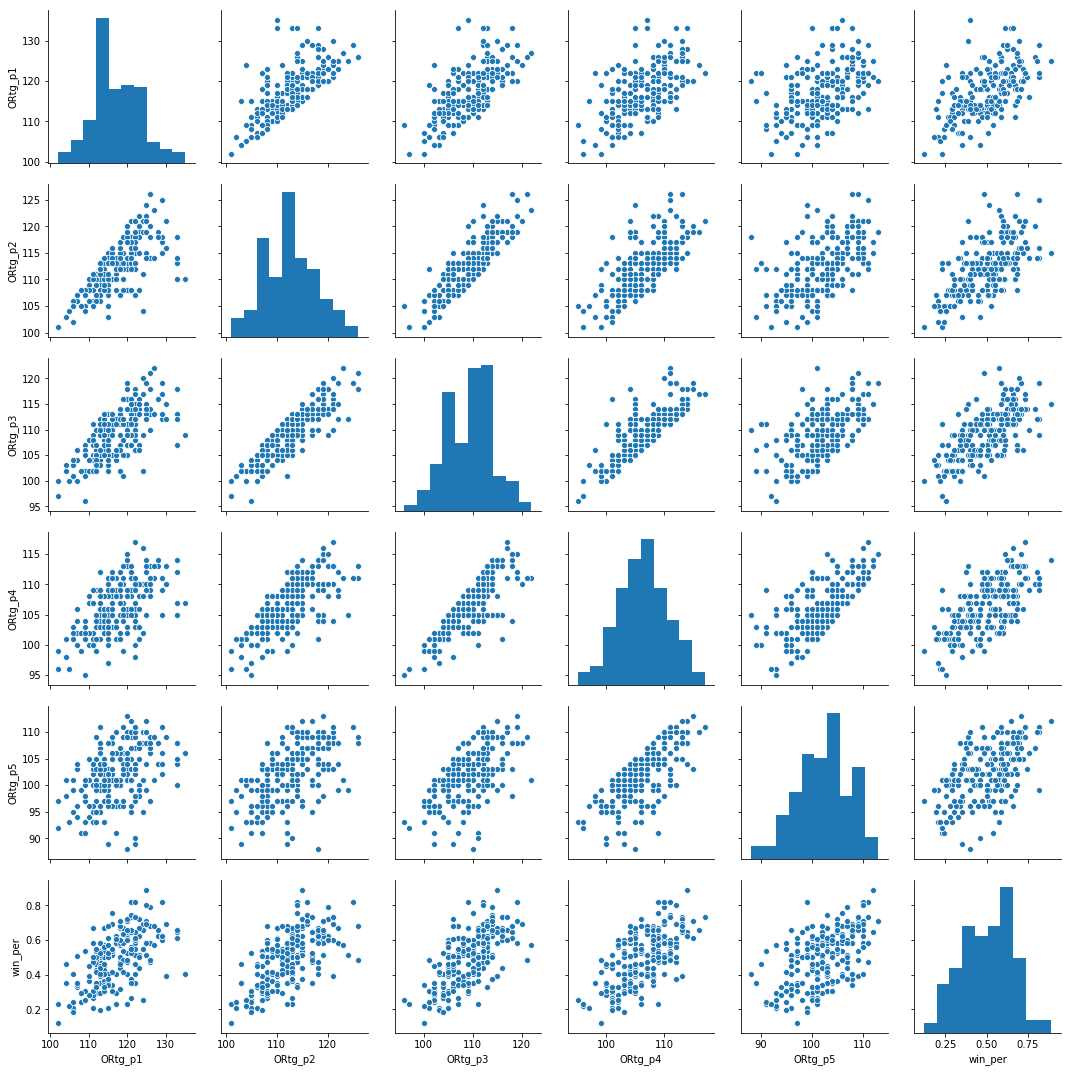

In [9]:
sns.pairplot(new_era.loc[:,['ORtg_p1', 'ORtg_p2','ORtg_p3','ORtg_p4','ORtg_p5','win_per']]);

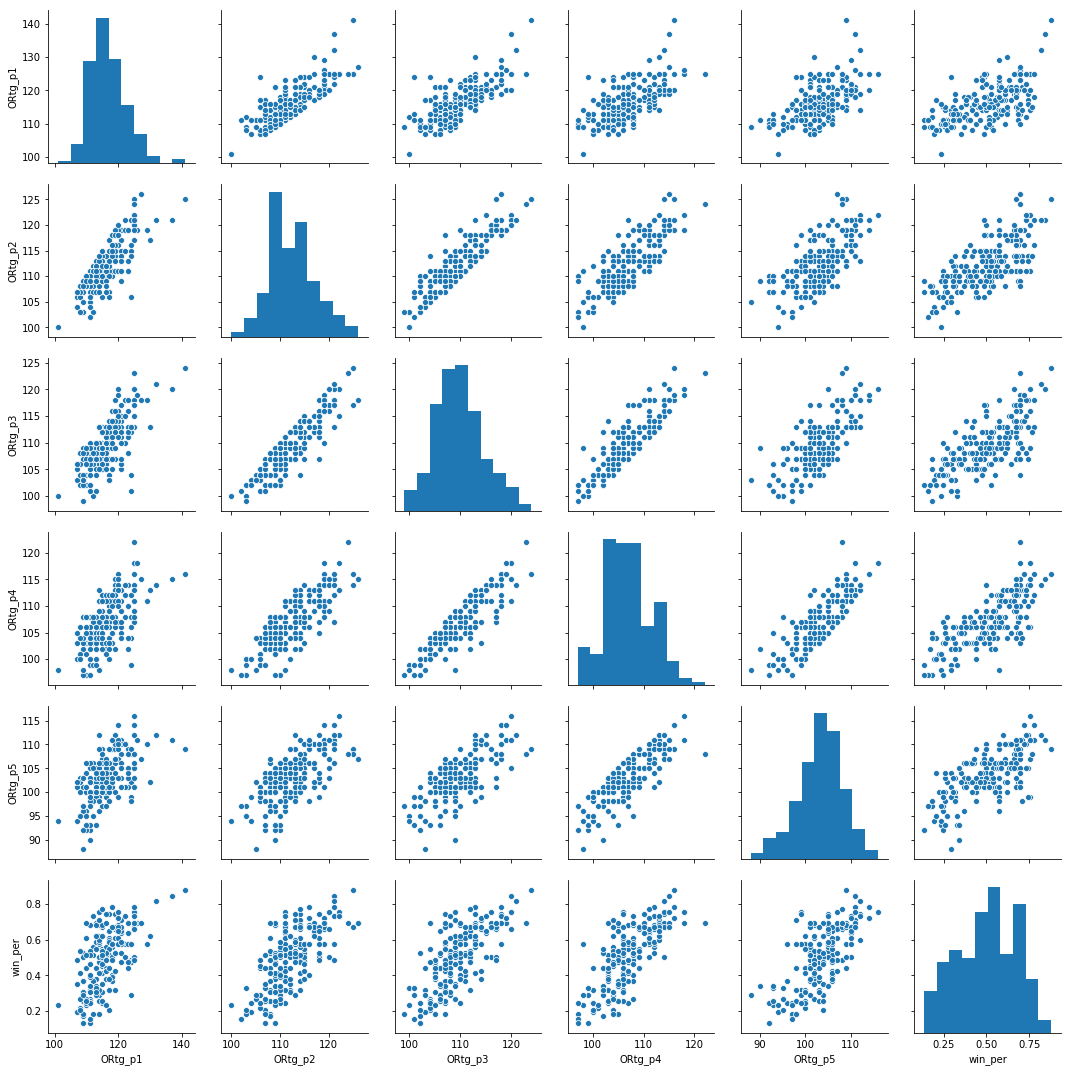

In [10]:
sns.pairplot(old_era.loc[:,['ORtg_p1', 'ORtg_p2','ORtg_p3','ORtg_p4','ORtg_p5','win_per']]);

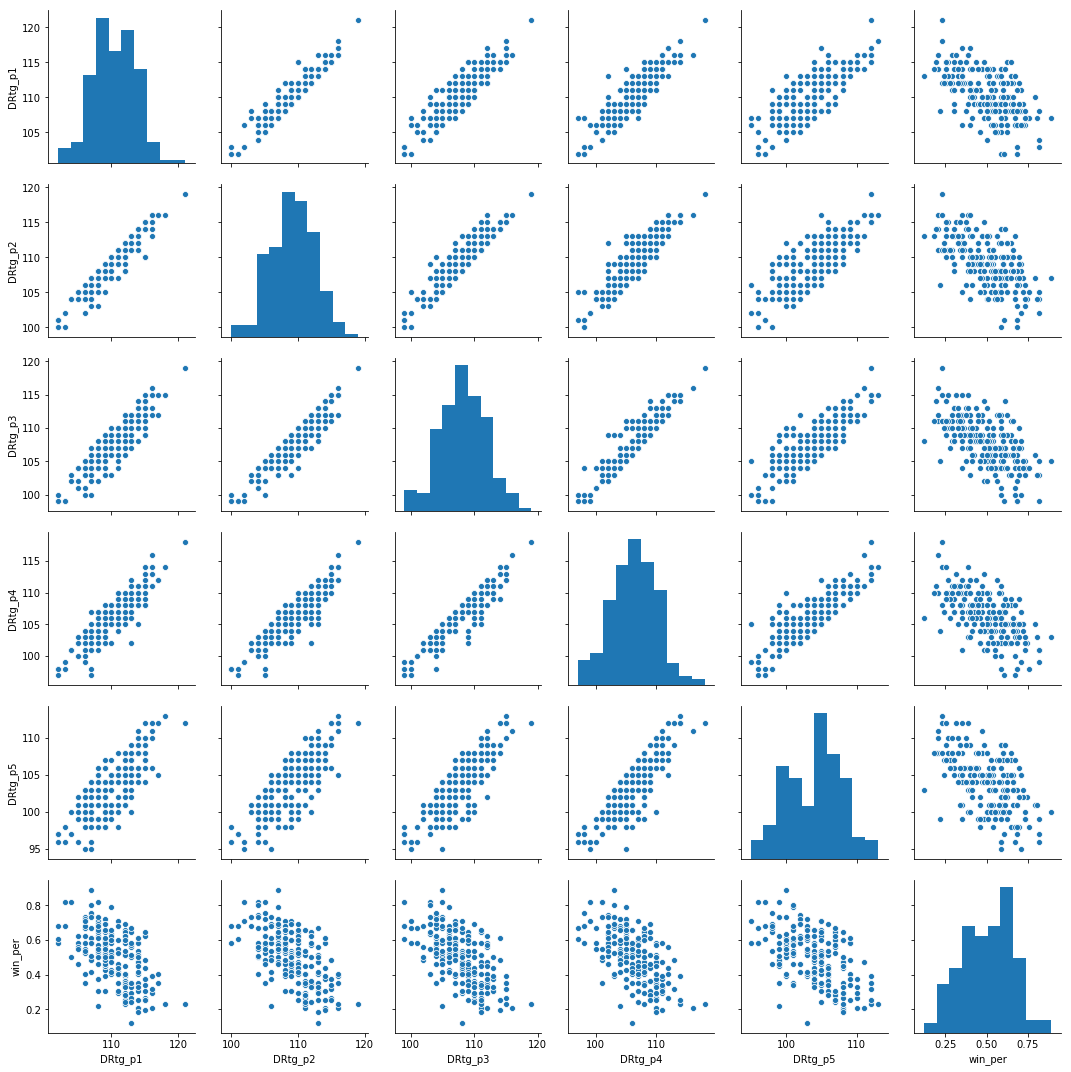

In [11]:
sns.pairplot(new_era.loc[:,['DRtg_p1', 'DRtg_p2','DRtg_p3','DRtg_p4','DRtg_p5','win_per']]);

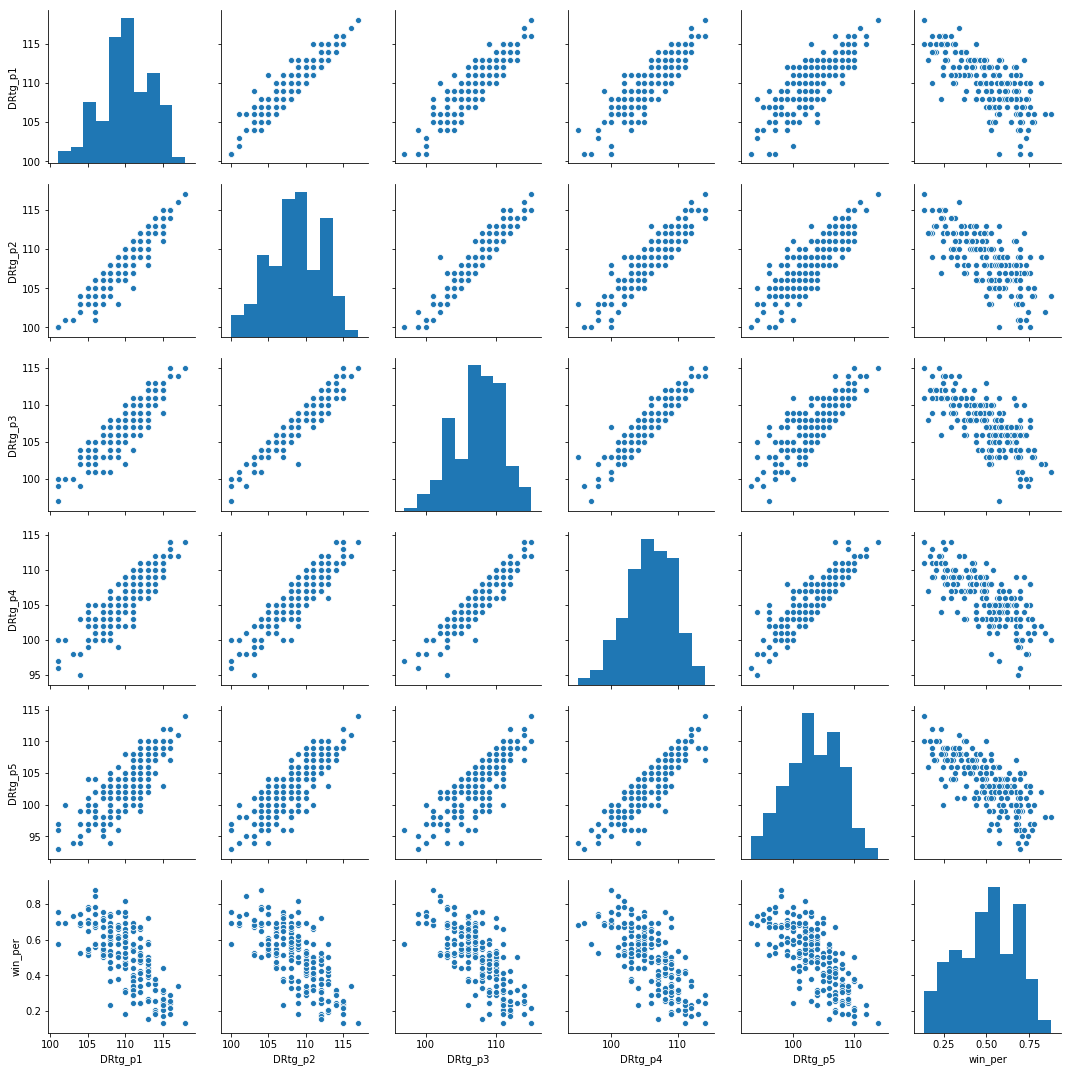

In [12]:
sns.pairplot(old_era.loc[:,['DRtg_p1', 'DRtg_p2','DRtg_p3','DRtg_p4','DRtg_p5','win_per']]);

In [13]:
# sns.heatmap(new_era.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [14]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('win_per ~ ORtg_p1 + ORtg_p2+ ORtg_p3+ ORtg_p4+ ORtg_p5 + DRtg_p1 + DRtg_p2+ DRtg_p3+ DRtg_p4+ DRtg_p5', data=new_era, return_type="dataframe")



# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                win_per   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     96.91
Date:                Fri, 12 Apr 2019   Prob (F-statistic):           7.15e-71
Time:                        11:58:13   Log-Likelihood:                 283.77
No. Observations:                 210   AIC:                            -545.5
Df Residuals:                     199   BIC:                            -508.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6865      0.192      3.577      0.000       0.308       1.065
ORtg_p1        0.0045      0.001      4.350      0.000       0.002       0.007
ORtg_p2        0.0052      0.002      2.661      0.008       0.001       0.009
ORtg_p3        0.0033      0.002      1.369      0.173      -0.001       0.008
ORtg_p4        0.0072      0.002      3.425      0.001       0.003       0.011
ORtg_p5        0.0038      0.001      3.006      0.003       0.001       0.006
DRtg_p1       -0.0118      0.004     -2.690      0.008      -0.020      -0.003
DRtg_p2       -0.0065      0.005     -1.324      0.187      -0.016       0.003
DRtg_p3        0.0012      0.004      0.271      0.787      -0.008       0.010
DRtg_p4       -0.0055      0.004     -1.432      0.154      -0.013       0.002
DRtg_p5       -0.0032      0.002     -1.408      0.161      -0.008       0.001
==============================================================================
Omnibus:                        1.869   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.393   Jarque-Bera (JB):                1.576
Skew:                           0.059   Prob(JB):                        0.455
Kurtosis:                       2.592   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

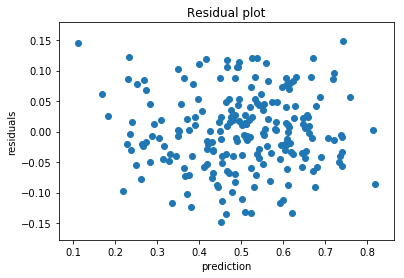

In [15]:
pred = fit.predict(X)
res = y.iloc[:,0] - pred
plt.scatter(pred, res)
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals");
    


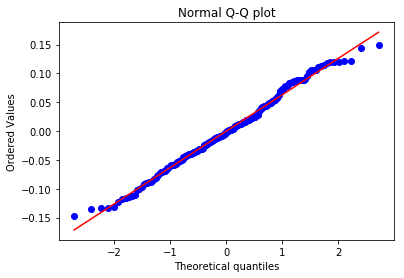

In [16]:
stats.probplot(res, dist="norm", plot=plt)
plt.title("Normal Q-Q plot");

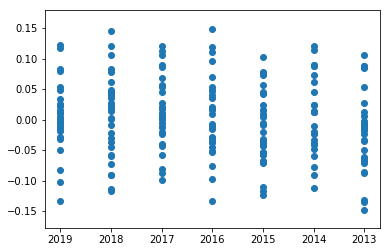

In [17]:
plt.scatter(y=res,x=new_era['year'])

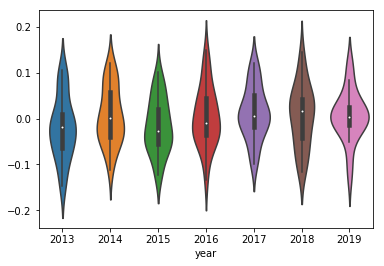

In [18]:
sns.violinplot(y=res,x=new_era['year'])

In [19]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('win_per ~ ORtg_p1 + ORtg_p2+ ORtg_p3+ ORtg_p4+ ORtg_p5 + DRtg_p1 + DRtg_p2+ DRtg_p3+ DRtg_p4+ DRtg_p5', data=old_era, return_type="dataframe")


# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                win_per   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     155.1
Date:                Fri, 12 Apr 2019   Prob (F-statistic):           4.65e-84
Time:                        11:58:14   Log-Likelihood:                 287.30
No. Observations:                 195   AIC:                            -552.6
Df Residuals:                     184   BIC:                            -516.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9273      0.205      4.524      0.000       0.523       1.332
ORtg_p1        0.0003      0.001      0.230      0.819      -0.002       0.003
ORtg_p2        0.0091      0.002      4.140      0.000       0.005       0.013
ORtg_p3        0.0047      0.002      2.028      0.044       0.000       0.009
ORtg_p4        0.0038      0.002      1.753      0.081      -0.000       0.008
ORtg_p5        0.0057      0.001      4.009      0.000       0.003       0.008
DRtg_p1       -0.0024      0.004     -0.673      0.502      -0.009       0.005
DRtg_p2       -0.0090      0.005     -1.791      0.075      -0.019       0.001
DRtg_p3       -0.0051      0.005     -1.108      0.269      -0.014       0.004
DRtg_p4       -0.0036      0.004     -1.006      0.316      -0.011       0.003
DRtg_p5       -0.0078      0.002     -3.637      0.000      -0.012      -0.004
==============================================================================
Omnibus:                        0.166   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.920   Jarque-Bera (JB):                0.285
Skew:                          -0.056   Prob(JB):                        0.867
Kurtosis:                       2.850   Cond. No.                     1.72e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

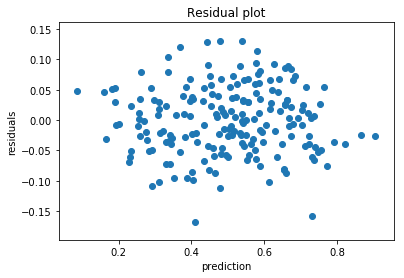

In [20]:
pred = fit.predict(X)
res = y.iloc[:,0] - pred
plt.scatter(pred, res)
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals");
    

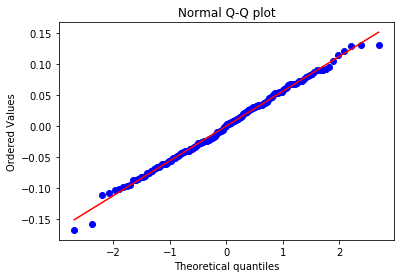

In [21]:
stats.probplot(res, dist="norm", plot=plt)
plt.title("Normal Q-Q plot");

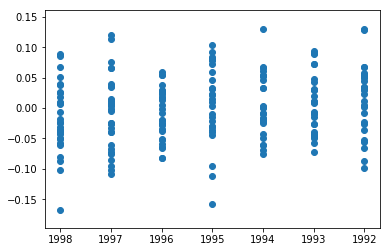

In [22]:
plt.scatter(y=res,x=old_era['year'])

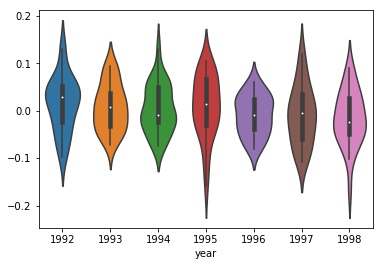

In [23]:
sns.violinplot(y=res,x=old_era['year'])